# 6.24 Optimizers

In this notebook, we'll have a look at two of the optimizers from the previous video:

1. Momentum
2. Adam 


## 1. Setup data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles, make_moons
from sklearn.model_selection import train_test_split

np.random.seed(seed=40)

X, y = make_moons(n_samples=200, noise=0.15)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

idx_class_0 = y == 0 
idx_class_1 = y == 1 


### 1.1 Plot the data

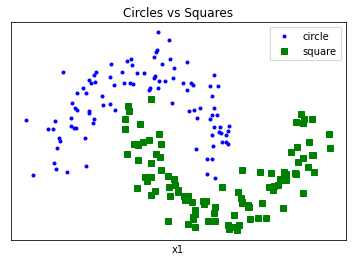

In [32]:
plt.plot(X[idx_class_0, 0], X[idx_class_0, 1], 'b.', label="circle")
plt.plot(X[idx_class_1, 0], X[idx_class_1, 1], 'gs', label="square")
plt.gca().axes.get_yaxis().set_visible(False)

plt.title("Circles vs Squares")
plt.xlabel("x1")
plt.ylabel("x2")
plt.xticks([])
plt.yticks([])
plt.legend()
plt.show()

## 2. Optimizers

ref: [scikit-learn MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier)

### Setup Helper functions

In [33]:
import matplotlib.pyplot as plt

def plot_loss(training_loss, sub_title):
    plt.plot(training_loss)
    plt.title(f"Training Loss ({sub_title}).")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.xlim(0, len(training_loss))
    plt.show()
    

### 2.1 Stochastic Gradient Descent

Validation set Accuracy Score: (sgd) 0.78


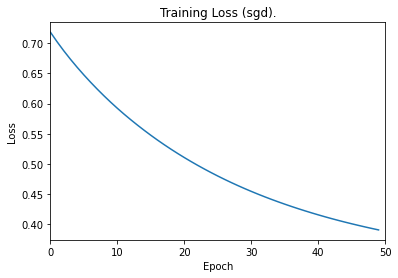

In [138]:
import warnings
from sklearn.neural_network import MLPClassifier
from sklearn.exceptions import ConvergenceWarning

##
## Note: This is squashing warnings about convergence. 
## This is because we're constraining the training to a max number of iterations of 50.
## For development, you should remove this.
##

warnings.filterwarnings("ignore", category=ConvergenceWarning) 
    
sgd_clf = MLPClassifier(solver = 'sgd', 
                    momentum=0, 
                    learning_rate = 'constant', 
                    learning_rate_init = 0.1,
                    max_iter=50).fit(X_train, y_train)

print("Validation set Accuracy Score: (sgd)", sgd_clf.score(X_test, y_test))
plot_loss(sgd_clf.loss_curve_, "sgd")

### 2.2 Momentum

Validation set Accuracy Score: (momentum) 0.92


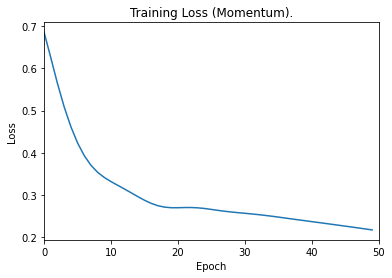

In [139]:
mm_clf = MLPClassifier(solver = 'sgd', 
                    momentum=0.9, 
                    learning_rate = 'constant', 
                    learning_rate_init = 0.2,
                    max_iter=50).fit(X_train, y_train)

print("Validation set Accuracy Score: (momentum)", mm_clf.score(X_test, y_test))
plot_loss(mm_clf.loss_curve_, "Momentum")

### 2.3 Adam

Validation set Accuracy Score: (Adam) 1.0


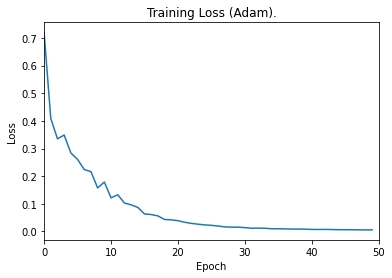

In [140]:
adam_clf = MLPClassifier(solver = 'adam', 
                    learning_rate_init = 0.2,
                    max_iter=50).fit(X_train, y_train)

print("Validation set Accuracy Score: (Adam)", adam_clf.score(X_test, y_test))
plot_loss(adam_clf.loss_curve_, "Adam")

## 3. Compare losses 

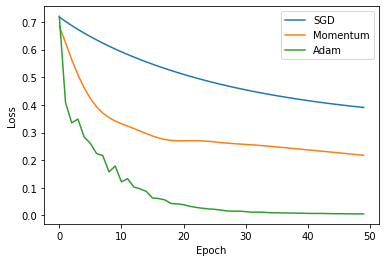

In [141]:
plt.plot(sgd_clf.loss_curve_, label="SGD")
plt.plot(mm_clf.loss_curve_, label="Momentum")
plt.plot(adam_clf.loss_curve_, label="Adam")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py

### Show decision boundary

In [142]:
def plot_decision_boundary(clf, X, y, model_name):
    
    h = .02 
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    idx_class_0 = y == 0 
    idx_class_1 = y == 1    
    
    z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    zz = z.reshape(xx.shape)
    ax = plt.subplot() 
    ax.contourf(xx, yy, zz, cmap=plt.cm.BuGn, alpha=.4)
    ax.plot(X[idx_class_0, 0], X[idx_class_0, 1], 'b.')
    ax.plot(X[idx_class_1, 0], X[idx_class_1, 1], 'gs')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    plt.title("Decision Boundary - {model_name}")
    plt.show()


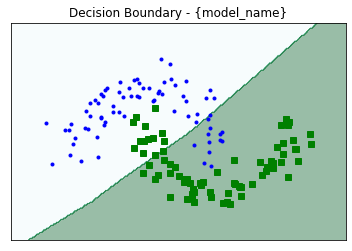

In [143]:
plot_decision_boundary(sgd_clf, X_train, y_train, "SGD")

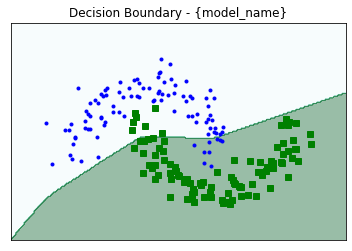

In [144]:
plot_decision_boundary(mm_clf, X, y, "Momentum")

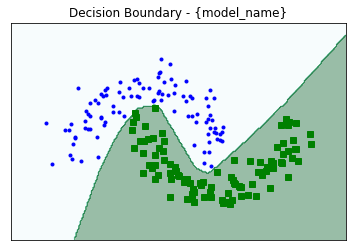

In [145]:
plot_decision_boundary(adam_clf, X, y, "Adam")